In [35]:
import pandas as pd
# define a function to read the file and the line like 'b O n d' will become 'bOnd'
import re
def get_word(file):
    '''
    input: src or tgt file in which the words are separated by space
    output: a list of strings without space
    '''
    processed_lines =[]
    for word in file:
        word = re.sub(r'(\<.+\>)|\n| ', '', word)
        processed_lines.append(word)
    return processed_lines

# get the wrongly and correclty predicrted results and store them in two lists separately
def get_predictions(pred_lines, test_lines, src_lines, orth_lines):
    '''
    input: the output of get_word function. The four arguments refer to the predicted result, tgt(Y), src(x), and orthographic information of the src file (which contains the orthographic information of the words). 
    output: a list of dictionary with corresponding information.
    '''
    wrong_pred = []
    for i in range(len(test_lines)):
        if test_lines[i]!= pred_lines[i]:
            wrong_pred.append({'present_orth': orth_lines[i],'present_phon': src_lines[i], 'past_phon': test_lines[i], 'pred': pred_lines[i],'correct':False})
        else:
            wrong_pred.append({'present_orth': orth_lines[i],'present_phon': src_lines[i], 'past_phon': test_lines[i], 'pred': pred_lines[i],'correct':True})
    return wrong_pred

with open('result.txt', 'w') as ff:
    ff.write('Language\tExperiment\tLing_feature\tDataset\tAccuracy_overall\tAccuracy_regular\tAccuracy_irregular\n')
    
# evaluate the predicting results
def evaluate(dir_pred, dir_test, dir_merge, dir_orth, dir_src, metainfo):
    '''
    input: the directory of the prediction file, tgt file, language_merge file, 
    the ortho src file (in the grapheme experiment, it is the same file as the src file), src file, and metainfo for better readbility
    metainfo is a list which include ['language', 'experiment+validation folder'(option:replication experiment_i or extended_i), ling_feauture(option:phoneme or grapheme), dataset(option:train, valid, or test)]
    output: the accuracy of overall performance, regular and irregular verbs; and the detailed information of the wrongly predicted results 
    the accuracy information will be stored in the file result.txt
    '''
    pred = open(dir_pred, 'r').readlines()
    test = open(dir_test, 'r').readlines()
    orth = open(dir_orth, 'r').readlines()
    source = open(dir_src, 'r').readlines()
    pred = get_word(pred)
    test = get_word(test)
    orth = get_word(orth)
    source = get_word(source)
    if 'english2' in metainfo:
        merged = pd.read_csv(dir_merge, sep='\t',names=['present_orth', 'past_orth','tense', 'present_phon', 'past_phon', 'reg'])
        wrong_pred = get_predictions(pred, test, source, orth)
    else:
        merged = pd.read_csv(dir_merge, sep='\t',names=['present_orth', 'past_orth', 'present_phon', 'past_phon', 'reg'])
        wrong_pred = get_predictions(pred, test, source, orth)
    test_pred = pd.DataFrame(wrong_pred, columns=['present_orth','present_phon', 'past_phon', 'pred', 'correct'])
    df_test = pd.merge(test_pred, merged)
    irreg = df_test.loc[df_test['reg']=='irreg']
    reg =  df_test.loc[df_test['reg']=='reg']
    irreg_wrong = df_test.loc[(df_test['reg']=='irreg') & (df_test['correct']==False)]
    reg_wrong = df_test.loc[(df_test['reg']=='reg') & (df_test['correct']==False)]
    wrong = df_test.loc[df_test['correct']==False]
    acc_irregular  = round(1-len(irreg_wrong)/len(irreg),3)
    acc_regular = round(1-len(reg_wrong)/len(reg),3)
    acc = round((1-len(wrong)/len(test)), 3)
    print('accuracy overall\taccuracy_regular\taccuracy_irregular')
    print('-'*100)
    print(acc, '\t\t', acc_regular, '\t\t', acc_irregular)
    acc_info = {'acc_overall': acc, 'acc_regular': acc_regular, 'acc_irregular': acc_irregular}
    with open('result.txt', 'a') as f:
        f.write(f'{metainfo[0]}\t{metainfo[1]}\t{metainfo[2]}\t{metainfo[3]}\t{acc}\t{acc_regular}\t{acc_irregular}\n')
    # title = '_'.join(metainfo)
    # irreg_wrong.to_csv(f'{title}_irreg.csv', sep='\t')
    # reg_wrong.to_csv(f'{title}_regular.csv',sep='\t')
    return  irreg_wrong, reg_wrong,  acc_info

# Experiment 1

## phoneme input: syllables of words output: past tense of words

In [36]:
# build the vocab 
!onmt_build_vocab -config cross_validation/phon/english1/2/english1.yaml -n_sample 3300

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 13:54:28,582 INFO] Counter vocab from 3300 samples.
[2022-10-10 13:54:28,582 INFO] Build vocab on 3300 transformed examples/corpus.
[2022-10-10 13:54:29,285 INFO] Counters src:38
[2022-10-10 13:54:29,286 INFO] Counters tgt:39


In [37]:
# train the data
!onmt_train -config cross_validation/phon/english1/2/english1.yaml

[2022-10-10 13:54:31,377 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-10-10 13:54:31,377 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 13:54:31,377 INFO] Missing transforms field for valid data, set to default: [].
[2022-10-10 13:54:31,377 INFO] Parsed 2 corpora from -data.
[2022-10-10 13:54:31,377 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-10-10 13:54:31,377 INFO] Loading vocab from text file...
[2022-10-10 13:54:31,377 INFO] Loading src vocabulary from cross_validation/phon/english1/2/example.vocab.src
[2022-10-10 13:54:31,378 INFO] Loaded src vocab has 38 tokens.
[2022-10-10 13:54:31,378 INFO] Loading tgt vocabulary from cross_validation/phon/english1/2/example.vocab.tgt
[2022-10-10 13:54:31,378 INFO] Loaded tgt vocab has 39 tokens.
[2022-10-10 13:54:31,378 INFO] Building fields with vocab in counters...
[2022-10-10 13:54:31,378 INFO]  * tgt vocab size: 43.
[2022-10-10 13:5

In [43]:
# predict the test set
!onmt_translate -model cross_validation/phon/english1/2/model_step_16160.pt -src cross_validation/phon/english1/2/src_test.txt -output cross_validation/phon/english1/2/pred_experiment1.txt -verbose


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 14:09:25,038 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 14:09:25,225 INFO] 
SENT 1: ['s', 'j', 'u', ':']
PRED 1: s j u : d
PRED SCO

In [40]:
# predict the train data set
!onmt_translate -model cross_validation/phon/english1/2/model_step_16160.pt -src cross_validation/phon/english1/2/src_train.txt -output cross_validation/phon/english1/2/pred_experiment_train.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 14:06:23,393 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 14:06:23,521 INFO] 
SENT 1: ['k', 'O', 'm', 'j', 'u', ':', 't']
PRED 1: k O

In [39]:
# predict the valid data set 
!onmt_translate -model cross_validation/phon/english1/2/model_step_16160.pt -src cross_validation/phon/english1/2/src_valid.txt -output cross_validation/phon/english1/2/pred_experiment_valid.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 14:06:19,832 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 14:06:19,955 INFO] 
SENT 1: ['z', 'I', 'p']
PRED 1: z I p t
PRED SCORE: -0.

In [44]:
import pandas as pd
#please change the directory!!!! 
english = 'cross_validation/english_merged_01.txt'
eng_pred_test = 'cross_validation/phon/english1/2/pred_experiment1.txt'
eng_tgt_test = 'cross_validation/phon/english1/2/tgt_test.txt'
eng_src_test = 'cross_validation/phon/english1/2/src_test.txt'
eng_orth_test ='cross_validation/orth/english1/2/src_test.txt'

eng_orth_train = 'cross_validation/orth/english1/2/src_train.txt'
eng_pred_train= 'cross_validation/phon/english1/2/pred_experiment_train.txt'
eng_tgt_train = 'cross_validation/phon/english1/2/tgt_train.txt'
eng_src_train = 'cross_validation/phon/english1/2/src_train.txt'

eng_pred_valid = 'cross_validation/phon/english1/2/pred_experiment_valid.txt'
eng_tgt_valid = 'cross_validation/phon/english1/2/tgt_valid.txt'
eng_orth_valid = 'cross_validation/orth/english1/2/src_valid.txt'
eng_src_valid = 'cross_validation/phon/english1/2/src_valid.txt'

metainfo_test = ['English', 'replication2', 'phoneme', 'test']
irreg_eng1, reg_eng1, acc_eng1 = evaluate(eng_pred_test, eng_tgt_test, english, eng_orth_test, eng_src_test, metainfo_test)
metainfo_train =['English', 'replication2', 'phoneme', 'train']
irreg_eng_train, reg_eng_train, acc_eng_train = evaluate(eng_pred_train, eng_tgt_train, english, eng_orth_train,eng_src_train,metainfo_train)
metainfo_valid = ['English', 'replication2', 'phoneme', 'valid']
irreg_eng_valid, reg_eng_valid, acc_eng_valid = evaluate(eng_pred_valid, eng_tgt_valid, english, eng_orth_valid,eng_src_valid, metainfo_valid)


len(irreg_eng1)
len(irreg_eng_valid)

irreg_eng_valid

accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.97 		 0.992 		 0.1
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.998 		 0.999 		 0.978
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.948 		 0.969 		 0.357


present_orth present_phon past_phon       pred  correct  past_orth    reg
12      underlie      Vnd@laI   Vnd@leI   Vnd@laId    False   underlay  irreg
29          swim         swIm      sw&m      swImd    False       swam  irreg
48         drink        drINk     dr&Nk     drINkt    False      drank  irreg
61         awake        @weIk     @w@Uk     @weIkt    False      awoke  irreg
107    overthrow     @Uv@Tr@U  @Uv@Tru:  @Uv@Tr@Ud    False  overthrew  irreg
122        throw         Tr@U      Tru:      Tr@Ud    False      threw  irreg
240        drive        draIv     dr@Uv     draIvd    False      drove  irreg
287        shoot         Su:t       SOt     Su:tId    False       shot  irreg
372         sell          sEl     s@Uld       sEld    False       sold  irreg

In [14]:
irreg_eng1

present_orth present_phon past_phon        pred  correct  past_orth    reg
112         blow         bl@U      blu:       bl@Ud    False       blew  irreg
129       become        b@kVm    b@keIm      b@kVmd    False     became  irreg
161          win          wIn       wVn        wInd    False        won  irreg
199        stick         stIk      stVk       stIkt    False      stuck  irreg
232        build         bIld      bIlt      bIldId    False      built  irreg
243     overhear    @Uv@hI@r*  @Uv@h3:d    @Uv@hI@d    False  overheard  irreg
263          bid          bId      beId       bIdId    False       bade  irreg
275        steal        sti:l     st@Ul      sti:ld    False      stole  irreg
325     override     @Uv@raId  @Uv@r@Ud  @Uv@raIdId    False   overrode  irreg
382        swear       swE@r*    swO:r*       swE@d    False      swore  irreg
400        beget        b@gEt     b@gOt     b@gEtId    False      begot  irreg

## U-shape

In [10]:
!onmt_translate -model data/run/phon/model_step_1620.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch10.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:23,120 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:23,230 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [11]:
!onmt_translate -model data/run/phon/model_step_3240.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch20.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:25,144 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:25,198 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [12]:
!onmt_translate -model data/run/phon/model_step_4860.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch30.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:27,117 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:27,195 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [13]:
!onmt_translate -model data/run/phon/model_step_6480.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch40.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:29,397 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:29,456 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [14]:
!onmt_translate -model data/run/phon/model_step_8100.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch50.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:31,428 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:31,492 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [15]:
!onmt_translate -model data/run/phon/model_step_9720.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch60.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:33,362 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:33,414 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [16]:
!onmt_translate -model data/run/phon/model_step_11340.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch70.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:35,390 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:35,443 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [17]:
!onmt_translate -model data/run/phon/model_step_12960.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch80.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:37,331 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:37,383 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [18]:
!onmt_translate -model data/run/phon/model_step_14580.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch90.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:39,242 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:39,296 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [19]:
!onmt_translate -model data/run/phon/model_step_16155.pt -src data/phon/src_test.txt -output data/phon/pred_experiment_epoch100.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-04-10 17:06:41,080 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-04-10 17:06:41,132 INFO] 
SENT 1: ['r', '@', 'f', 'r', '&', 'k', 't']
PRED 1: r @

In [20]:
acc_ushape =[]
for num in range(10,101,10):
    eng_epoch = 'data/phon/pred_experiment_epoch'+str(num)+'.txt'
    irreg_eng, reg_eng, acc_eng = evaluate(eng_epoch, eng_tgt_test, english, eng_orth_test, eng_src_test)
    acc_ushape.append(acc_eng)
    file = open('data/u_shape.txt', 'a+')
    file.write(f'\n epoch:{num} \n')
    file.write('accuracy overall \t accuracy_regular \t accuracy_irregular \n')
    file.write('-'*100)
    file.write('\n')
    file.write(str(acc_eng['acc_overall'])+'\t'+str(acc_eng['acc_regular'])+'\t'+str(acc_eng['acc_irregular']))
    file.write('\n')
    file.write(irreg_eng.to_string())
    file.close()

17 387
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.926 		 0.964 		 0.059
17 387
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.946 		 0.982 		 0.118
17 387
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.958 		 0.992 		 0.176
17 387
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.958 		 0.992 		 0.176
17 387
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.96 		 0.99 		 0.294
17 387
accuracy overall	accuracy_regular	accuracy_irregular
-----------------

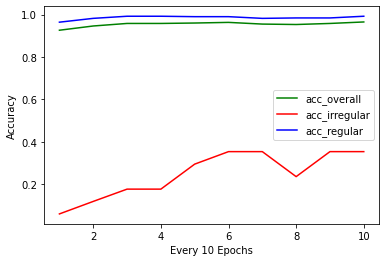

In [21]:
import matplotlib.pyplot as plt
acc_ushape = pd.DataFrame(acc_ushape, columns=['acc_overall', 'acc_regular', 'acc_irregular'])

x = range(1,11)

fig, ax = plt.subplots()
ax.plot(x,acc_ushape['acc_overall'], color = 'green', label = 'acc_overall')
ax.plot(x,acc_ushape['acc_irregular'], color = 'red', label = 'acc_irregular')
ax.plot(x, acc_ushape['acc_regular'], color = 'blue', label ='acc_regular')
ax.legend(loc = 'center right')
plt.xlabel('Every 10 Epochs')
plt.ylabel('Accuracy')
plt.show()

# Experiment2


In [50]:
!onmt_build_vocab -config cross_validation/phon/english2/2/english2.yaml -n_sample 14970


Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 14:25:27,234 INFO] Counter vocab from 14970 samples.
[2022-10-10 14:25:27,235 INFO] Build vocab on 14970 transformed examples/corpus.
[2022-10-10 14:25:28,014 INFO] Counters src:43
[2022-10-10 14:25:28,014 INFO] Counters tgt:38


In [52]:
!onmt_train -config cross_validation/phon/english2/2/english2.yaml

[2022-10-10 14:27:13,596 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-10-10 14:27:13,596 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 14:27:13,596 INFO] Missing transforms field for valid data, set to default: [].
[2022-10-10 14:27:13,596 INFO] Parsed 2 corpora from -data.
[2022-10-10 14:27:13,597 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-10-10 14:27:13,597 INFO] Loading vocab from text file...
[2022-10-10 14:27:13,597 INFO] Loading src vocabulary from cross_validation/phon/english2/2/example.vocab.src
[2022-10-10 14:27:13,598 INFO] Loaded src vocab has 43 tokens.
[2022-10-10 14:27:13,598 INFO] Loading tgt vocabulary from cross_validation/phon/english2/2/example.vocab.tgt
[2022-10-10 14:27:13,599 INFO] Loaded tgt vocab has 38 tokens.
[2022-10-10 14:27:13,599 INFO] Building fields with vocab in counters...
[2022-10-10 14:27:13,600 INFO]  * tgt vocab size: 42.
[2022-10-10 14:2

In [54]:
!onmt_translate -model cross_validation/phon/english2/2/model_step_74850.pt -src cross_validation/phon/english2/2/src_test.txt -output cross_validation/phon/english2/2/pred_experiment2.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 15:26:56,864 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 15:26:56,986 INFO] 
SENT 1: ['<V;PST>', 's', 'j', 'u', ':']
PRED 1: s j u :

In [55]:
!onmt_translate -model cross_validation/phon/english2/2/model_step_74850.pt -src cross_validation/phon/english2/2/src_valid.txt -output cross_validation/phon/english2/2/pred_experiment2_valid.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 15:28:01,254 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 15:28:01,415 INFO] 
SENT 1: ['<V;PST>', 'z', 'I', 'p']
PRED 1: z I p t
PRED

In [58]:
!onmt_translate -model cross_validation/phon/english2/2/model_step_74850.pt -src cross_validation/phon/english2/2/src_train.txt -output cross_validation/phon/english2/2/pred_experiment2_train.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 15:29:13,468 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 15:29:13,630 INFO] 
SENT 1: ['<V;V.PTCP;PRS>', 'b', 'r', 'i', ':', 'f']
PRE

In [59]:
pred_eng2 = 'cross_validation/phon/english2/2/pred_experiment2.txt'
pred_eng2_valid = 'cross_validation/phon/english2/2/pred_experiment2_valid.txt'
pred_eng2_train = 'cross_validation/phon/english2/2/pred_experiment2_train.txt'
tgt_eng2_train = 'cross_validation/phon/english2/2/tgt_train.txt'
src_eng2_train ='cross_validation/phon/english2/2/src_train.txt'
english2 = 'cross_validation/english_merged_02.txt'
eng2_orth_train ='cross_validation/phon/english2/2/src_train_orth.txt'

metainfo_ex2_phon_t = ['English', 'replication2_multi', 'phoneme', 'train', 'english2' ]
irre_eng2_train, reg_eng2_train, acc_eng2_train = evaluate(pred_eng2_train, tgt_eng2_train, english2, eng2_orth_train, src_eng2_train, metainfo_ex2_phon_t)
metainfo_ex2_phon = ['English', 'replication2_multi', 'phoneme', 'test' ]
irre_eng2, reg_eng2, acc_eng2 = evaluate(pred_eng2, eng_tgt_test, english, eng_orth_test, eng_src_test, metainfo_ex2_phon)
metainfo_ex2_phon_v = ['English', 'replication2_multi', 'phoneme', 'valid' ]
irre_eng2_valid, reg_eng2_valid, acc_eng2_valid = evaluate(pred_eng2_valid, eng_tgt_valid, english, eng_orth_valid, eng_src_valid, metainfo_ex2_phon_v)

accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.999 		 1.0 		 1.0
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.965 		 0.987 		 0.1
accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.96 		 0.982 		 0.357


In [114]:
with open(src_eng2_train, 'r') as ee:
    lines =ee.readlines()
    lines = set(get_word(lines))

print(len(lines))

with open(tgt_eng2_train, 'r') as aa:
    bb = aa.readlines()
    cc = set(get_word(bb))

print(len(cc))

14885
11920


In [142]:
irre_eng2

present_orth present_phon past_phon      pred  correct past_orth    reg
19      overcome      @Uv@kVm  @Uv@keIm  @Uv@kVmd    False  overcame  irreg
59           lie          laI       leI      laId    False       lay  irreg
127        begin        b@gIn     b@g&n    b@gInd    False     began  irreg
204          see          si:       sO:      si:d    False       saw  irreg
232       outrun       aUtrVn    aUtr&n    aUtrVn    False    outran  irreg
241          eat          i:t       eIt     i:tId    False       ate  irreg
280         keep         ki:p      kEpt     ki:pt    False      kept  irreg
329      forsake      fO:seIk    fO:sUk  fO:seIkt    False   forsook  irreg
357          sit          sIt       s&t     sItId    False       sat  irreg
400      foresee       fO:si:    fO:sO:   fO:si:d    False   foresaw  irreg

# Challenge

## Learning the past tense in the form of phonological transcription

### Dutch

In [60]:
!onmt_build_vocab -config cross_validation/phon/dutch/2/dutch.yaml -n_sample 5000

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 15:33:21,210 INFO] Counter vocab from 5000 samples.
[2022-10-10 15:33:21,211 INFO] Build vocab on 5000 transformed examples/corpus.
[2022-10-10 15:33:22,224 INFO] Counters src:39
[2022-10-10 15:33:22,224 INFO] Counters tgt:39


In [61]:
!onmt_train -config cross_validation/phon/dutch/2/dutch.yaml

[2022-10-10 15:33:32,892 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-10-10 15:33:32,892 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 15:33:32,892 INFO] Missing transforms field for valid data, set to default: [].
[2022-10-10 15:33:32,893 INFO] Parsed 2 corpora from -data.
[2022-10-10 15:33:32,893 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-10-10 15:33:32,893 INFO] Loading vocab from text file...
[2022-10-10 15:33:32,893 INFO] Loading src vocabulary from cross_validation/phon/dutch/2/example.vocab.src
[2022-10-10 15:33:32,893 INFO] Loaded src vocab has 39 tokens.
[2022-10-10 15:33:32,893 INFO] Loading tgt vocabulary from cross_validation/phon/dutch/2/example.vocab.tgt
[2022-10-10 15:33:32,899 INFO] Loaded tgt vocab has 39 tokens.
[2022-10-10 15:33:32,900 INFO] Building fields with vocab in counters...
[2022-10-10 15:33:32,900 INFO]  * tgt vocab size: 43.
[2022-10-10 15:33:32,9

In [62]:
!onmt_translate -model cross_validation/phon/dutch/2/model_step_23705.pt -src cross_validation/phon/dutch/2/src_test.txt -output cross_validation/phon/dutch/2/pred_experiment_dutch.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 15:55:03,256 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 15:55:03,425 INFO] 
SENT 1: ['b', '@', 't', 'a', 'l', '@']
PRED 1: b @ t a 

In [65]:
pred_dutch = 'cross_validation/phon/dutch/2/pred_experiment_dutch.txt'
test_dutch = 'cross_validation/phon/dutch/2/tgt_test.txt'
orth_dutch = 'cross_validation/orth/dutch/2/src_test.txt'
source_dutch = 'cross_validation/phon/dutch/2/src_test.txt'
dutch_merged = 'cross_validation/dutch_merged.txt'


In [66]:
metainfo_dutch=['dutch', 'extension2', 'phoneme','test']
irreg_wrong, reg_wrong, acc_dutch = evaluate(pred_dutch, test_dutch, dutch_merged, orth_dutch, source_dutch, metainfo_dutch)

reg_wrong

accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.973 		 0.977 		 0.937


present_orth present_phon past_phon       pred  correct    past_orth  reg
92          tint         tInt     tInt@      tInd@    False       tintte  reg
206        reist         rKst     rKzd@        res    False       reisde  reg
232       kruien        krLj@     krLd@     krLjd@    False      kruiden  reg
289    polijsten      polKst@   polKst@     poles@    False   polijstten  reg
319         krui          krL     krLd@       krof    False       kruide  reg
375        kruit         krLt     krLd@       krot    False       kruide  reg
414      polijst       polKst   polKst@    polKzd@    False    polijstte  reg
449    verleiden      v@rlKd@   v@rlKd@    v@rled@    False   verleidden  reg
490       nieten         nit@      nit@       not@    False      nietten  reg
513          let          lEt      lEt@       lEd@    False        lette  reg
526      bersten       bErst@    bErst@  bErst@nd@    False     berstten  reg
580   verblijden     v@rblKd@  v@rblKd@    v@rbad@    False  verblijdden  reg

### English

In [69]:

!onmt_build_vocab -config cross_validation/phon/english/2/english.yaml -n_sample 5000


Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 18:07:19,349 INFO] Counter vocab from 5000 samples.
[2022-10-10 18:07:19,349 INFO] Build vocab on 5000 transformed examples/corpus.
[2022-10-10 18:07:20,345 INFO] Counters src:48
[2022-10-10 18:07:20,346 INFO] Counters tgt:48


In [71]:
!onmt_train -config cross_validation/phon/english/2/english.yaml

[2022-10-10 19:21:24,935 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-10-10 19:21:24,937 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 19:21:24,937 INFO] Missing transforms field for valid data, set to default: [].
[2022-10-10 19:21:24,937 INFO] Parsed 2 corpora from -data.
[2022-10-10 19:21:24,937 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-10-10 19:21:24,937 INFO] Loading vocab from text file...
[2022-10-10 19:21:24,938 INFO] Loading src vocabulary from cross_validation/phon/english/2/example.vocab.src
[2022-10-10 19:21:24,940 INFO] Loaded src vocab has 48 tokens.
[2022-10-10 19:21:24,940 INFO] Loading tgt vocabulary from cross_validation/phon/english/2/example.vocab.tgt
[2022-10-10 19:21:24,940 INFO] Loaded tgt vocab has 48 tokens.
[2022-10-10 19:21:24,941 INFO] Building fields with vocab in counters...
[2022-10-10 19:21:24,941 INFO]  * tgt vocab size: 52.
[2022-10-10 19:21:

In [73]:
!onmt_translate -model cross_validation/phon/english/2/model_step_24420.pt -src cross_validation/phon/english/2/src_test.txt -output cross_validation/phon/english/2/pred_experiment_eng.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 22:30:05,495 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 22:30:05,570 INFO] 
SENT 1: ['s', '1', 't', 's']
PRED 1: s 1 t I d
PRED SCO

In [78]:
pred_eng = 'cross_validation/phon/english/2/pred_experiment_eng.txt'
test_eng ='cross_validation/phon/english/2/tgt_test.txt'
orth_eng = 'cross_validation/orth/english/2/src_test.txt'
src_eng = 'cross_validation/phon/english/2/src_test.txt'
english_merged = 'cross_validation/english_merged_new.txt'

metainfo_eng=['English','extension2', 'phoneme', 'test']
irreg_eng, reg_eng, acc_eng = evaluate(pred_eng, test_eng,english_merged, orth_eng, src_eng, metainfo_eng)

accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.948 		 0.991 		 0.714


### German

In [80]:
!onmt_build_vocab -config cross_validation/phon/german/2/german.yaml -n_sample 5000

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 22:43:45,741 INFO] Counter vocab from 5000 samples.
[2022-10-10 22:43:45,741 INFO] Build vocab on 5000 transformed examples/corpus.
[2022-10-10 22:43:46,398 INFO] Counters src:42
[2022-10-10 22:43:46,398 INFO] Counters tgt:42


In [81]:
!onmt_train -config cross_validation/phon/german/2/german.yaml

[2022-10-10 22:44:01,688 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2022-10-10 22:44:01,689 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2022-10-10 22:44:01,689 INFO] Missing transforms field for valid data, set to default: [].
[2022-10-10 22:44:01,689 INFO] Parsed 2 corpora from -data.
[2022-10-10 22:44:01,689 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2022-10-10 22:44:01,689 INFO] Loading vocab from text file...
[2022-10-10 22:44:01,689 INFO] Loading src vocabulary from cross_validation/phon/german/2/example.vocab.src
[2022-10-10 22:44:01,690 INFO] Loaded src vocab has 42 tokens.
[2022-10-10 22:44:01,690 INFO] Loading tgt vocabulary from cross_validation/phon/german/2/example.vocab.tgt
[2022-10-10 22:44:01,690 INFO] Loaded tgt vocab has 42 tokens.
[2022-10-10 22:44:01,690 INFO] Building fields with vocab in counters...
[2022-10-10 22:44:01,690 INFO]  * tgt vocab size: 46.
[2022-10-10 22:44:01

In [82]:
!onmt_translate -model cross_validation/phon/german/2/model_step_27900.pt -src cross_validation/phon/german/2/src_test.txt -output cross_validation/phon/german/2/pred_experiment_german.txt -verbose

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/onmt/modules/embeddings.py:195: UserWarning: Not merging with sum and positive feat_vec_size, but got non-default feat_vec_exponent. It will be unused.
  warnings.warn("Not merging with sum and positive "
[2022-10-10 23:06:11,875 INFO] Translating shard 0.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
[2022-10-10 23:06:12,033 INFO] 
SENT 1: ['S', 'r', 'W', 't', '@']
PRED 1: S r I t
PRED 

In [83]:
pred_german = 'cross_validation/phon/german/2/pred_experiment_german.txt'
test_german = 'cross_validation/phon/german/2/tgt_test.txt'
source_german = 'cross_validation/phon/german/2/src_test.txt'
german_merged ='cross_validation/german_merged.txt'
orth_german = 'cross_validation/orth/german/2/src_test.txt'

metainfo_german=['german', 'extension', 'phoneme', 'test']
irre_german, reg_german, acc_german = evaluate(pred_german, test_german, german_merged, orth_german, source_german, metainfo_german)
reg_german

accuracy overall	accuracy_regular	accuracy_irregular
----------------------------------------------------------------------------------------------------
0.994 		 0.997 		 0.971


present_orth present_phon   past_phon          pred  correct    past_orth  \
175   veranlasst    fEr&nl&st  fEr&nl&st@  fEr&nl&st@st    False  veranlasste   
194       kniest        knist     knit@st      knist@st    False     knietest   

     reg  
175  reg  
194  reg

# Visualization

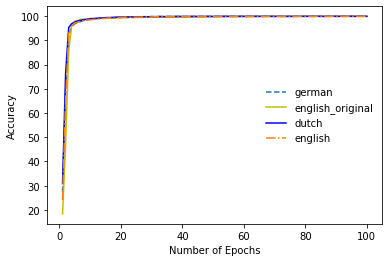

In [73]:
import re
import matplotlib.pyplot as plt
eng_dir_ex1 = 'data/phon/log_file_exp1.txt'
german_dir = 'data_german/log_file_german_pho.txt'
dutch_dir = 'data_dutch/phon/log_file_nld_pho.txt'
eng_dir = 'data_eng/phon/log_file_eng_pho.txt'

def get_accuracy(logfile_dir):
    log_file = open(logfile_dir, 'r').readlines()
    accuracy =[]
    for line in log_file:
        if 'acc' in line:
            acc = re.search('acc:\s+(\d{2}.\d{2})', line)
            if acc:
                accuracy.append(float(acc.group(1)))
    return accuracy


fig, ax = plt.subplots()
# print
x_axis = [x for x in range(1,101)]
acc_german = get_accuracy(german_dir) 
acc_eng1 = get_accuracy(eng_dir_ex1)
acc_dutch = get_accuracy(dutch_dir)
acc_eng = get_accuracy(eng_dir)
ax.plot(x_axis, acc_german, '--', label = 'german')
ax.plot(x_axis, acc_eng1,'y', label = 'english_original')
ax.plot(x_axis, acc_dutch,'b', label = 'dutch')
ax.plot(x_axis, acc_eng,'-.', label = 'english')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='center right', frameon=False)
 

In [69]:
len(acc_eng1)

300

In [70]:
len(acc_german)

100

In [71]:
len(acc_eng)

300

In [150]:
for i in range(2,12,2):
    print(i)

2
4
6
8
10
